In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
# data set is in another folder which is in the same level as this folder, not the file

# Loading the cleaned dataset from earlier
data = pd.read_csv('../data/TMDB_cleaned.csv')

In [3]:
data.head()

,id,title,adult,backdrop_path,imdb_id,overview,genres,production_companies,keywords
0,1,Inception,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,tt1375666,"Cobb, a skilled thief who commits corporate es...","Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","rescue, mission, dream, airplane, paris, franc..."
1,2,Interstellar,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,tt0816692,The adventures of a group of explorers who mak...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","rescue, future, spacecraft, race against time,..."
2,3,The Dark Knight,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,tt0468569,Batman raises the stakes in his war on crime. ...,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","joker, sadism, chaos, secret identity, crime f..."
3,4,Avatar,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,tt0499549,"In the 22nd century, a paraplegic Marine is di...","Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","future, society, culture clash, space travel, ..."
4,5,The Avengers,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,tt0848228,When an unexpected enemy emerges and threatens...,"Science Fiction, Action, Adventure",Marvel Studios,"new york city, superhero, shield, based on com..."


In [4]:
# Getting an idea on the shape of the data and performing EDA on the data

print(data.shape)
for feature in data.columns:
    print(feature)

(93123, 9)
id
title
adult
backdrop_path
imdb_id
overview
genres
production_companies
keywords


# Since this is the cleaned data that has been loaded, we can solely focus on the EDA and map/plot some of the key features of the dataset which are as follows:
- Genre Distribution.
- Uniqe keywords.
- Keywords and genre correlation.
- Production Companies.
- Adult vs Non Adult Movies.
- Avergae length of movies.
- Keyword frequency based on the presence of adult content.

In [5]:
# Lets take a look all the distinct genres in the dataset
genres = set()
keywords = set()

for genre in data['genres']:
    for g in genre.split(','):
        genres.add(g)

for keyword in data['keywords']:
    for k in keyword.split(','):
        keywords.add(k)

#pretty print the genres
print(genres)
print(keywords)


{' Documentary', 'Science Fiction', 'War', ' Action', ' Romance', ' TV Movie', ' Drama', 'Fantasy', 'Comedy', ' Science Fiction', 'Thriller', ' Fantasy', ' Music', 'Crime', ' War', ' Thriller', ' Mystery', 'Horror', 'Drama', ' Family', 'Family', ' Comedy', ' Animation', 'Mystery', 'Western', 'Animation', 'Action', ' Crime', 'Romance', ' History', ' Western', ' Horror', ' Adventure', 'TV Movie', 'Music', 'History', 'Documentary', 'Adventure'}
{'french restaurant', ' social classes', ' mexican revolution', ' medieval', 'lolita', ' herd of sheep', ' british pub', ' 成人', ' class relations', ' authoritarian', ' medo', ' character comedy', ' rich man poor woman', ' stage struck', ' malnutrition', ' midlife crisis', ' auto racing', ' simulation', 'body exchange', ' irish sea', ' aka people', ' death of boyfriend', 'usa history', ' manila', 'soldiers', ' bizet', ' former porn star', ' poor', ' back stabbing', ' bank teller', ' swinger club', ' trucking', ' split in two', ' sugihara', ' moll', 

## Plotting / Finding correlation between different keywords and genres

<Axes: title={'center': 'Top Keywords Shared Across Genres'}, ylabel='keywords'>

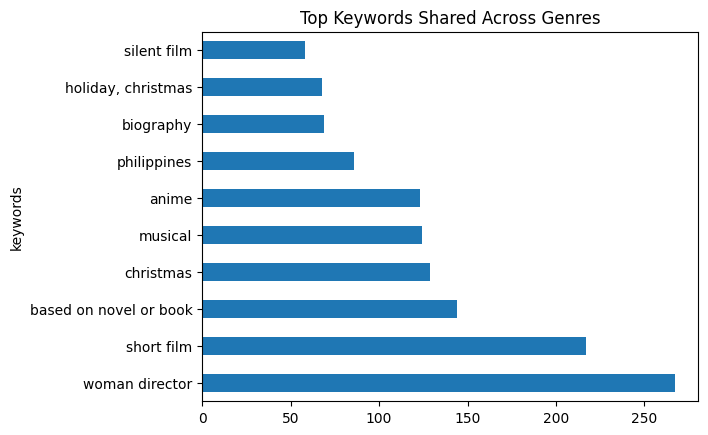

In [6]:
keyword_genre_counts = data.explode('genres').explode('keywords').groupby('keywords')['genres'].nunique().sort_values(ascending=False) # seperating the genres and keywords and counting the number of unique genres for each keyword
keyword_genre_counts.head(10).plot(kind='barh', title='Top Keywords Shared Across Genres')
# thre recommender will be based on these keywords and genres

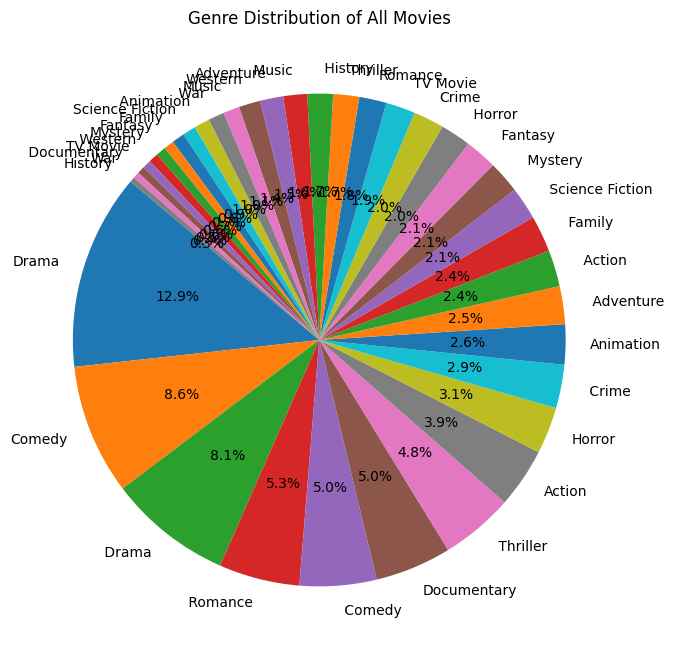

In [7]:
# Genre distribution of all movies combined
genre_counts = data['genres'].str.split(',').explode().value_counts()

plt.figure(figsize=(10, 8))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Genre Distribution of All Movies')
plt.ylabel('')  # Hide the y-label
plt.show()

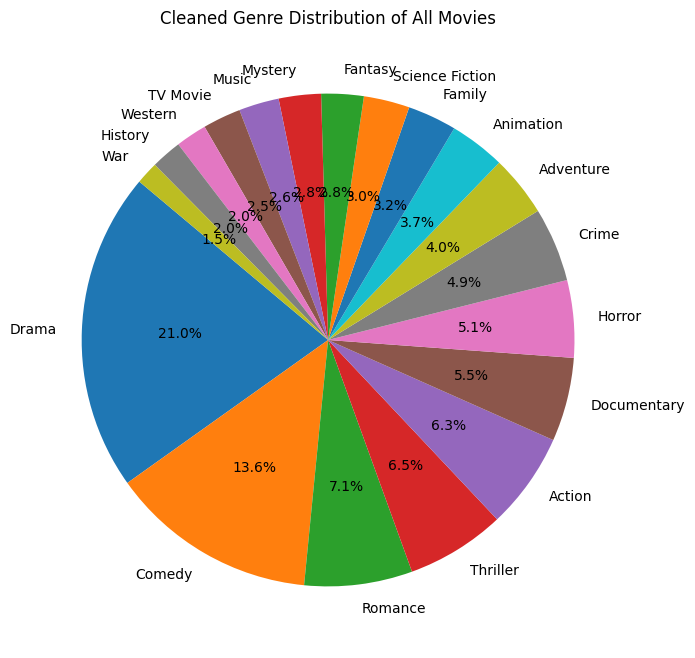

In [8]:
# The above graph is unclean with some genres having leading/trailing whitespace. We can clean this up by stripping the whitespace from each genre name. We can do this by splitting the genres on the comma and then stripping the whitespace from each genre name. We can then join the genre names back together with a comma. We can then plot the cleaned genre distribution.

# Clean the genre names by stripping leading/trailing whitespace
data['genres'] = data['genres'].apply(lambda x: ','.join([genre.strip() for genre in x.split(',')]))

genre_counts_cleaned = data['genres'].str.split(',').explode().value_counts() # split the genres and count the number of each genre

# Plot the cleaned genre distribution
plt.figure(figsize=(10, 8))
genre_counts_cleaned.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Cleaned Genre Distribution of All Movies')
plt.ylabel('')  # Hide the y-label
plt.show()

# Importing models and testing with the data for the recommender system.

In [9]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MultiLabelBinarizer

In [10]:
# Define a function to handle splitting only if the value is a string
def split_genres(genre_entry):
    if isinstance(genre_entry, str):  # Only apply split if it's a string
        return genre_entry.split(', ')  # Split by comma and space
    return genre_entry  # Return the list as-is if it's already a list

In [11]:
data['genres'] = data['genres'].apply(split_genres)

In [12]:
mlb = MultiLabelBinarizer() # using mlb for onehot encoding the genres column

In [13]:
genres_encoded = mlb.fit_transform(data['genres']) # onehot encoding the genres column

In [14]:
genres_encoded_df = pd.DataFrame(genres_encoded,columns=mlb.classes_)

In [15]:
genres_encoded_df.head() #OHE maynot be the most efficient process but it is the most understandable and easy to apply therefore the process of choice for the first iteration of the project.

,Action,"Action,Adventure","Action,Adventure,Animation","Action,Adventure,Animation,Comedy","Action,Adventure,Animation,Comedy,Crime,TV Movie","Action,Adventure,Animation,Comedy,Family","Action,Adventure,Animation,Comedy,Family,Science Fiction","Action,Adventure,Animation,Crime,Science Fiction","Action,Adventure,Animation,Documentary,Family,History","Action,Adventure,Animation,Drama",...,"Western,Romance,Music","Western,Romance,TV Movie","Western,Science Fiction,Crime,Romance","Western,TV Movie","Western,Thriller","Western,War","Western,War,Action","Western,War,Adventure","Western,War,Drama,Music","Western,War,Romance"
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data = pd.concat([data, genres_encoded_df], axis=1)  # concating with the original data

In [17]:
data.head()

,id,title,adult,backdrop_path,imdb_id,overview,genres,production_companies,keywords,Action,...,"Western,Romance,Music","Western,Romance,TV Movie","Western,Science Fiction,Crime,Romance","Western,TV Movie","Western,Thriller","Western,War","Western,War,Action","Western,War,Adventure","Western,War,Drama,Music","Western,War,Romance"
0,1,Inception,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,tt1375666,"Cobb, a skilled thief who commits corporate es...","[Action,Science Fiction,Adventure]","Legendary Pictures, Syncopy, Warner Bros. Pict...","rescue, mission, dream, airplane, paris, franc...",0,...,0,0,0,0,0,0,0,0,0,0
1,2,Interstellar,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,tt0816692,The adventures of a group of explorers who mak...,"[Adventure,Drama,Science Fiction]","Legendary Pictures, Syncopy, Lynda Obst Produc...","rescue, future, spacecraft, race against time,...",0,...,0,0,0,0,0,0,0,0,0,0
2,3,The Dark Knight,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,tt0468569,Batman raises the stakes in his war on crime. ...,"[Drama,Action,Crime,Thriller]","DC Comics, Legendary Pictures, Syncopy, Isobel...","joker, sadism, chaos, secret identity, crime f...",0,...,0,0,0,0,0,0,0,0,0,0
3,4,Avatar,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,tt0499549,"In the 22nd century, a paraplegic Marine is di...","[Action,Adventure,Fantasy,Science Fiction]","Dune Entertainment, Lightstorm Entertainment, ...","future, society, culture clash, space travel, ...",0,...,0,0,0,0,0,0,0,0,0,0
4,5,The Avengers,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,tt0848228,When an unexpected enemy emerges and threatens...,"[Science Fiction,Action,Adventure]",Marvel Studios,"new york city, superhero, shield, based on com...",0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Initialize the KNN model
knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=5)

# Fit the model based on the one-hot encoded genres
knn_model.fit(genres_encoded)

NearestNeighbors(algorithm='brute', metric='cosine')

In [19]:
def recommend_movies_based_on_genre(title, data, knn_model, n_recommendations=5):
    # Get the index of the movie that matches the title
    movie_index = data[data['title'] == title].index[0]

    # Get the genre vector for that movie
    genre_vector = genres_encoded[movie_index].reshape(1, -1)
    
    # Find the nearest neighbors (most similar movies)
    distances, indices = knn_model.kneighbors(genre_vector, n_neighbors=n_recommendations + 1)  # +1 to exclude the movie itself
    
    # Get the recommended movie indices (excluding the first, which is the movie itself)
    recommended_movie_indices = indices.flatten()[1:]

    # Return the recommended movie titles
    return data['title'].iloc[recommended_movie_indices]

In [20]:
# Example usage
recommendations = recommend_movies_based_on_genre('Inception', data, knn_model)
print("Recommended movies:")
print(recommendations)


Recommended movies:
91191               Rebel Moon - Part One: A Child of Fire
90008                      Godzilla x Kong: The New Empire
82629                           Avengers: The Kang Dynasty
80368                      Ultraman: Monster Movie Feature
59080    Kamen Rider Saber + Kikai Sentai Zenkaiger: Su...
Name: title, dtype: object


In [21]:
data.head()

,id,title,adult,backdrop_path,imdb_id,overview,genres,production_companies,keywords,Action,...,"Western,Romance,Music","Western,Romance,TV Movie","Western,Science Fiction,Crime,Romance","Western,TV Movie","Western,Thriller","Western,War","Western,War,Action","Western,War,Adventure","Western,War,Drama,Music","Western,War,Romance"
0,1,Inception,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,tt1375666,"Cobb, a skilled thief who commits corporate es...","[Action,Science Fiction,Adventure]","Legendary Pictures, Syncopy, Warner Bros. Pict...","rescue, mission, dream, airplane, paris, franc...",0,...,0,0,0,0,0,0,0,0,0,0
1,2,Interstellar,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,tt0816692,The adventures of a group of explorers who mak...,"[Adventure,Drama,Science Fiction]","Legendary Pictures, Syncopy, Lynda Obst Produc...","rescue, future, spacecraft, race against time,...",0,...,0,0,0,0,0,0,0,0,0,0
2,3,The Dark Knight,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,tt0468569,Batman raises the stakes in his war on crime. ...,"[Drama,Action,Crime,Thriller]","DC Comics, Legendary Pictures, Syncopy, Isobel...","joker, sadism, chaos, secret identity, crime f...",0,...,0,0,0,0,0,0,0,0,0,0
3,4,Avatar,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,tt0499549,"In the 22nd century, a paraplegic Marine is di...","[Action,Adventure,Fantasy,Science Fiction]","Dune Entertainment, Lightstorm Entertainment, ...","future, society, culture clash, space travel, ...",0,...,0,0,0,0,0,0,0,0,0,0
4,5,The Avengers,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,tt0848228,When an unexpected enemy emerges and threatens...,"[Science Fiction,Action,Adventure]",Marvel Studios,"new york city, superhero, shield, based on com...",0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
def recommend_movies_based_on_title(title, data, knn_model, n_recommendations=5):
    # Get the index of the movie that matches the title
    movie_index = data[data['title'] == title].index[0]

    # Get the genre vector for that movie
    genre_vector = genres_encoded[movie_index].reshape(1, -1)
    
    # Find the nearest neighbors (most similar movies)
    distances, indices = knn_model.kneighbors(genre_vector, n_neighbors=n_recommendations + 1)  # +1 to exclude the movie itself
    
    # Get the recommended movie indices (excluding the first, which is the movie itself)
    recommended_movie_indices = indices.flatten()[1:]

    # Return the recommended movie titles
    return data['title'].iloc[recommended_movie_indices]

def recommend_movies_based_on_genre(genre, data, knn_model, n_recommendations=5):
    # Check if the genre exists in the dataset
    if genre not in mlb.classes_:
        raise ValueError(f"Genre '{genre}' not found in the dataset.")
    
    # Create a genre vector for the given genre
    genre_vector = np.zeros(len(mlb.classes_))
    genre_vector[mlb.classes_.tolist().index(genre)] = 1
    genre_vector = genre_vector.reshape(1, -1)
    
    # Find the nearest neighbors (most similar movies)
    distances, indices = knn_model.kneighbors(genre_vector, n_neighbors=n_recommendations)
    
    # Get the recommended movie indices
    recommended_movie_indices = indices.flatten()

    # Return the recommended movie titles
    return data['title'].iloc[recommended_movie_indices]

# Example usage
title_recommendations = recommend_movies_based_on_title('Inception', data, knn_model, n_recommendations=5)
print("Recommended movies based on title:")
print(title_recommendations)

genre_recommendations = recommend_movies_based_on_genre('Comedy', data, knn_model, n_recommendations=5)
print("Recommended movies based on genre:")
print(genre_recommendations)

Recommended movies based on title:
91191               Rebel Moon - Part One: A Child of Fire
90008                      Godzilla x Kong: The New Empire
82629                           Avengers: The Kang Dynasty
80368                      Ultraman: Monster Movie Feature
59080    Kamen Rider Saber + Kikai Sentai Zenkaiger: Su...
Name: title, dtype: object
Recommended movies based on genre:
6646              Italiano medio
6688    The Gendarme in New York
6702             The Parisian B*
6698          The Hungover Games
6691               Spoiled Brats
Name: title, dtype: object


In [25]:
import pickle

# Save the KNN model to a file
with open('knn_model.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

# Save the MultiLabelBinarizer to a file
with open('mlb.pkl', 'wb') as file:
    pickle.dump(mlb, file)

In [26]:
# save the current dataset as a csv file
data.to_csv('TMDB_cleaned_encoded.csv', index=False)

In [27]:
data2 = pd.read_csv('TMDB_cleaned_encoded.csv')